# ROC (Pdox_ID)

In [1]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, validation_curve, learning_curve, train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# import data
dat = pd.read_csv('final_permit_uncode.csv')
dat.head()

,pdox_b1_id,elapsed_workdays,alias,Project_Status,job_class,Ward,green_floor_area,use_type,permit_type,PRICE,...,PRC,Plumbing_Review,QA_Review,Structural_Review,WASA_Review,WMATA_Review,White_House_Review,Zoning_Review,over_90,over_150
0,AN1700124,62.0,0,0,2,6.0,0.000000,1,0,6.209515,...,0.0,0.0,0.0,22.0,0.0,0.0,0.0,23.0,0,0
1,AN1700215,100.0,1,6,6,5.0,3.260071,1,0,5.525045,...,9.0,0.0,7.0,26.0,0.0,0.0,0.0,14.0,1,0
2,AN1700235,65.0,0,0,3,5.0,3.147367,0,0,5.755875,...,5.0,0.0,8.0,18.0,0.0,0.0,0.0,3.0,0,0
3,AN1700242,91.0,0,0,7,1.0,4.238508,0,0,5.705008,...,5.0,0.0,11.0,32.0,0.0,0.0,0.0,26.0,1,0
4,AN1700244,57.0,1,0,6,2.0,2.389928,1,0,6.172507,...,1.0,0.0,6.0,18.0,0.0,0.0,0.0,21.0,0,0


In [4]:
# create X and Y
X = dat.drop(["elapsed_workdays","pdox_b1_id","over_90","over_150"], axis = 1)
Y2 = dat["over_150"] # over150
X.columns

Index(['alias', 'Project_Status', 'job_class', 'Ward', 'green_floor_area',
       'use_type', 'permit_type', 'PRICE', 'QUALIFIED', 'LIVING_GBA',
       'USECODE', 'LANDAREA', 'EYFC', 'use_change', 'num_units_change',
       'gfa_change', 'ReviewCycle', 'CFA_Review', 'Chinatown_Review',
       'DC_Water_Review', 'DDOE_Review', 'DDOT_Review', 'DOEE_Review',
       'DOH_Review', 'EISF_Review', 'Electrical_Review', 'Elevator_Review',
       'Energy_Review', 'File_Room', 'Fire_Review', 'Green_Review',
       'HPRB_Review', 'Mechanical_Review', 'NCPC_Review', 'PRC',
       'Plumbing_Review', 'QA_Review', 'Structural_Review', 'WASA_Review',
       'WMATA_Review', 'White_House_Review', 'Zoning_Review'],
      dtype='object')

In [23]:
Y1 = dat["over_90"] # over90
Y = dat["elapsed_workdays"] # Y as continuous variablr

# over150

In [7]:
#Fitting a Naive Bayes model
bayes= GaussianNB()
bayes.fit(X,Y2)

GaussianNB(priors=None, var_smoothing=1e-09)

In [8]:
# Performing  10-fold cross-validation
cross_val_score(bayes, X, Y2, cv=10)

array([0.85929648, 0.92462312, 0.89949749, 0.90954774, 0.91457286,
       0.90452261, 0.89393939, 0.87878788, 0.88324873, 0.92385787])

In [9]:
# Determining the size of the trainning set
sizes = np.arange(100, 1800,100)
print('Sizes: ', sizes)
train_sizes, train_scores2, test_scores2 = learning_curve(bayes, X, Y2, cv=10, train_sizes=sizes)
train_mean2 = np.mean(train_scores2, axis=1)
test_mean2 = np.mean(test_scores2, axis=1)
test_mean2

Sizes:  [ 100  200  300  400  500  600  700  800  900 1000 1100 1200 1300 1400
 1500 1600 1700]


array([0.66273427, 0.7038913 , 0.89635764, 0.88765455, 0.88966711,
       0.88107853, 0.8810811 , 0.88056587, 0.87500254, 0.87298739,
       0.86141689, 0.85281819, 0.86287351, 0.8719493 , 0.88153013,
       0.88859333, 0.89666158])

In [10]:
# split training and test 
training_size = 1700
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X, Y2, train_size=training_size, 
                                                test_size=X.shape[0]-training_size)                                                
bayes.fit(Xtrain2, ytrain2)
y_pred4 = bayes.predict(Xtest2)

In [12]:
# true positives and false positives
false_positive_rate4, true_positive_rate4, thresholds4 = roc_curve(ytest2, y_pred4, pos_label=1)
rates4 = pd.DataFrame(dict(fpr4=false_positive_rate4, tpr4=true_positive_rate4))
roc_auc4 = auc(rates4['fpr4'], rates4['tpr4'])
print('AUC SVC: ', roc_auc4)

AUC SVC:  0.8754528985507246


In [13]:
dt = tree.DecisionTreeClassifier()

In [14]:
dt.fit(X,Y2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
cross_val_score(dt, X, Y2, cv=10)

array([0.90954774, 0.83417085, 0.85929648, 0.82914573, 0.81407035,
       0.93467337, 0.95454545, 0.94949495, 0.93908629, 0.87309645])

In [16]:
dt.fit(Xtrain2, ytrain2)
y_pred5 = dt.predict(Xtest2)

In [17]:
# true positives and false positives
false_positive_rate5, true_positive_rate5, thresholds5 = roc_curve(ytest2, y_pred5, pos_label=1)
rates5 = pd.DataFrame(dict(fpr5=false_positive_rate5, tpr5=true_positive_rate5))
roc_auc5 = auc(rates5['fpr5'], rates5['tpr5'])
print('AUC SVC: ', roc_auc5)

AUC SVC:  0.9330842391304348


In [18]:
#fit logit model
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X,Y2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
# Performing  10-fold cross-validation
cross_val_score(logreg, X, Y2, cv=10)

array([0.96482412, 0.9798995 , 0.96482412, 0.94974874, 0.9798995 ,
       0.99497487, 0.98484848, 0.99494949, 1.        , 0.97461929])

In [20]:
logreg.fit(Xtrain2, ytrain2)
y_pred6 = logreg.predict(Xtest2)

In [21]:
# true positives and false positives
false_positive_rate6, true_positive_rate6, thresholds6 = roc_curve(ytest2, y_pred6, pos_label=1)
rates6 = pd.DataFrame(dict(fpr6=false_positive_rate6, tpr6=true_positive_rate6))
roc_auc6 = auc(rates6['fpr6'], rates6['tpr6'])
print('AUC SVC: ', roc_auc6)

AUC SVC:  0.9756567028985507


In [34]:
# KNN
# Test which k performs the best
k_range = range(1,20)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y2, cv=10, scoring = 'accuracy')
    k_scores.append(scores.mean())

[0.921899079049042,
 0.9042041335220429,
 0.9264140525217484,
 0.9223557798220451,
 0.930936717118897,
 0.9248759822287358,
 0.9319315131778463,
 0.9248504482109056,
 0.9329263350027066,
 0.925870778287685,
 0.9268834430059334,
 0.9248606515116732,
 0.9304163358967837,
 0.9243632663651539,
 0.9288986206734847,
 0.9268783671214607,
 0.9309086709247409,
 0.9223251699197419,
 0.9298857771398137]

In [36]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(Xtrain2, ytrain2)
y_pred2 = knn.predict(Xtest2)

In [38]:
# true positives and false positives
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(ytest2, y_pred2, pos_label=1)
rates2 = pd.DataFrame(dict(fpr2=false_positive_rate2, tpr2=true_positive_rate2))
roc_auc2 = auc(rates2['fpr2'], rates2['tpr2'])
print('AUC SVC: ', roc_auc2)

AUC SVC:  0.9026268115942029


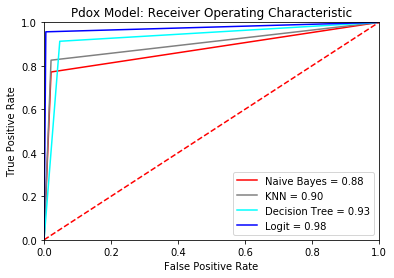

In [41]:
#ROC curve over150
plt.plot(rates4.fpr4, rates4.tpr4, 'b',color='red', label = 'Naive Bayes = %0.2f' % roc_auc4)
plt.plot(rates2.fpr2, rates2.tpr2, 'b',color='grey', label = 'KNN = %0.2f' % roc_auc2)
plt.plot(rates5.fpr5, rates5.tpr5, 'b',color='cyan', label = 'Decision Tree = %0.2f' % roc_auc5)
plt.plot(rates6.fpr6, rates6.tpr6, 'b',color='blue',label = 'Logit = %0.2f' % roc_auc6)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Pdox Model: Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()

# over90

In [43]:
#Fitting a Naive Bayes model
bayes= GaussianNB()
bayes.fit(X,Y1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
# split training and test 
training_size = 1700
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(X, Y1, train_size=training_size, 
                                                test_size=X.shape[0]-training_size)                                                
bayes.fit(Xtrain1, ytrain1)
y_pred4 = bayes.predict(Xtest1)

In [47]:
# true positives and false positives
false_positive_rate4, true_positive_rate4, thresholds4 = roc_curve(ytest1, y_pred4, pos_label=1)
rates4 = pd.DataFrame(dict(fpr4=false_positive_rate4, tpr4=true_positive_rate4))
roc_auc4 = auc(rates4['fpr4'], rates4['tpr4'])
print('AUC SVC: ', roc_auc4)

AUC SVC:  0.9237389612333483


In [48]:
dt = tree.DecisionTreeClassifier()

In [49]:
dt.fit(X,Y1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
cross_val_score(dt, X, Y1, cv=10)

array([0.74874372, 0.8040201 , 0.82914573, 0.87939698, 0.93969849,
       0.9798995 , 0.96969697, 0.96969697, 0.94923858, 0.85279188])

In [51]:
dt.fit(Xtrain1, ytrain1)
y_pred5 = dt.predict(Xtest1)

In [52]:
# true positives and false positives
false_positive_rate5, true_positive_rate5, thresholds5 = roc_curve(ytest1, y_pred5, pos_label=1)
rates5 = pd.DataFrame(dict(fpr5=false_positive_rate5, tpr5=true_positive_rate5))
roc_auc5 = auc(rates5['fpr5'], rates5['tpr5'])
print('AUC SVC: ', roc_auc5)

AUC SVC:  0.9346155765105024


In [53]:
#fit logit model
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X,Y1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
# Performing  10-fold cross-validation
cross_val_score(logreg, X, Y1, cv=10)

array([0.92964824, 0.96984925, 0.9798995 , 0.96482412, 0.9798995 ,
       1.        , 0.99494949, 0.99494949, 1.        , 0.99492386])

In [55]:
logreg.fit(Xtrain1, ytrain1)
y_pred6 = logreg.predict(Xtest1)

In [56]:
# true positives and false positives
false_positive_rate6, true_positive_rate6, thresholds6 = roc_curve(ytest1, y_pred6, pos_label=1)
rates6 = pd.DataFrame(dict(fpr6=false_positive_rate6, tpr6=true_positive_rate6))
roc_auc6 = auc(rates6['fpr6'], rates6['tpr6'])
print('AUC SVC: ', roc_auc6)

AUC SVC:  0.9645761612533055


In [58]:
# KNN
# Test which k performs the best
k_range = range(1,20)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y1, cv=10, scoring = 'accuracy')
    k_scores.append(scores.mean())

In [60]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(Xtrain1, ytrain1)
y_pred2 = knn.predict(Xtest1)

In [61]:
# true positives and false positives
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(ytest1, y_pred2, pos_label=1)
rates2 = pd.DataFrame(dict(fpr2=false_positive_rate2, tpr2=true_positive_rate2))
roc_auc2 = auc(rates2['fpr2'], rates2['tpr2'])
print('AUC SVC: ', roc_auc2)

AUC SVC:  0.9335428828019757


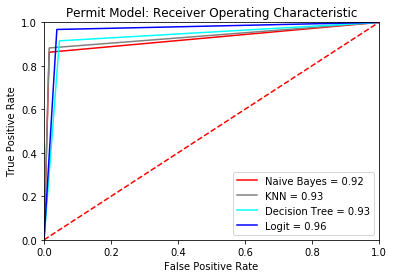

In [62]:
#ROC curve over90
plt.plot(rates4.fpr4, rates4.tpr4, 'b',color='red', label = 'Naive Bayes = %0.2f' % roc_auc4)
plt.plot(rates2.fpr2, rates2.tpr2, 'b',color='grey', label = 'KNN = %0.2f' % roc_auc2)
plt.plot(rates5.fpr5, rates5.tpr5, 'b',color='cyan', label = 'Decision Tree = %0.2f' % roc_auc5)
plt.plot(rates6.fpr6, rates6.tpr6, 'b',color='blue',label = 'Logit = %0.2f' % roc_auc6)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Pdox Model: Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()